In [1]:
# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [269]:
#데이터셋로드
x_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity.csv').sort_values(by='acc_id', ascending=True)
y_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)['label']

In [270]:
x_data = x_load
y_data = y_load

In [271]:
set(y_data)

{'2month', 'month', 'retained', 'week'}

In [272]:
#8주차만 뽑기
x_data = x_data[x_data['wk'] == 8]

## retain removed
---

In [6]:
#retained removed filter
retain_removed_filter = (y_data != "retained").values

In [7]:
x_data_retain_removed = x_data.iloc[retain_removed_filter]

In [8]:
y_data_retain_removed = y_data.iloc[retain_removed_filter]

## week removed 
---

In [9]:
week_removed_filter = (y_data_retain_removed != "week").values

In [10]:
x_data_week_removed = x_data_retain_removed.iloc[week_removed_filter]

In [11]:
y_data_week_removed = y_data_retain_removed.iloc[week_removed_filter]

## train / test set
---

In [12]:
y_data = y_data.map(lambda v: "retained" if v == "retained" else "etc")

In [273]:
#주차데이터, 유저아이디제거
x_data = x_data.drop(['wk','acc_id'], axis=1)

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x_data.values, y_data.values, test_size=0.3, random_state=0)

## retained removed train / test set
---

In [15]:
y_data_retain_removed = y_data_retain_removed.map(lambda v: "week" if v == "week" else "etc")

In [16]:
x_data_retain_removed = x_data_retain_removed.drop(['wk', 'acc_id'], axis=1)

In [17]:
x_train_retain_removed, x_test_retain_removed, y_train_retain_removed, y_test_retain_removed = train_test_split(x_data_retain_removed.values, y_data_retain_removed.values, test_size=0.3, random_state=0)

## week removed train / test set
---

In [30]:
y_data_week_removed = y_data_week_removed.map(lambda v: "month" if v == "month" else "2month")

In [31]:
x_data_week_removed = x_data_week_removed.drop(['wk', 'acc_id'], axis=1)

In [162]:
x_train_week_removed, x_test_week_removed, y_train_week_removed, y_test_week_removed = train_test_split(x_data_week_removed.values, y_data_week_removed.values, test_size=0.1, random_state=1)

# 랜덤포레스트
---

## normal
---

In [18]:
forest_normal = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1, max_features=10, max_depth=20)

In [19]:
forest_normal.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
print("훈련 세트 정확도: {:.3f}".format(forest_normal.score(x_train, y_train)))

훈련 세트 정확도: 0.928


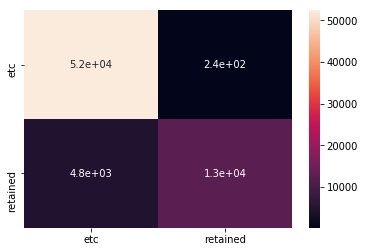

In [21]:
cm = pd.DataFrame(confusion_matrix(y_train, forest_normal.predict(x_train)), columns=forest_normal.classes_, index=forest_normal.classes_)
sns.heatmap(cm, annot=True)

In [22]:
print("테스트 세트 정확도: {:.3f}".format(forest_normal.score(x_test, y_test)))

테스트 세트 정확도: 0.872


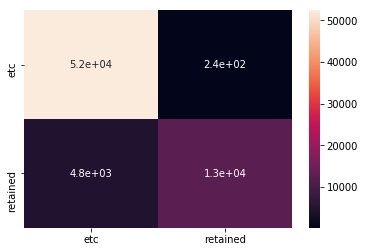

In [23]:
cm = pd.DataFrame(confusion_matrix(y_train, forest_normal.predict(x_train)), columns=forest_normal.classes_, index=forest_normal.classes_)
sns.heatmap(cm, annot=True)

## retain removed
---

In [24]:
forest_retained = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1, max_features=10, max_depth=20)

In [25]:
forest_retained.fit(x_train_retain_removed, y_train_retain_removed)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
print("훈련 세트 정확도: {:.3f}".format(forest_retained.score(x_train_retain_removed, y_train_retain_removed)))

훈련 세트 정확도: 0.975


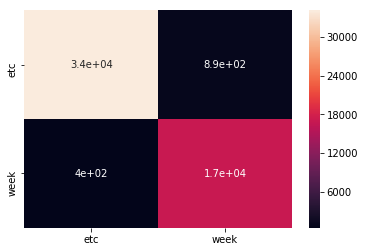

In [27]:
cm = pd.DataFrame(confusion_matrix(y_train_retain_removed, forest_retained.predict(x_train_retain_removed)), columns=forest_retained.classes_, index=forest_retained.classes_)
sns.heatmap(cm, annot=True)

In [28]:
print("테스트 세트 정확도: {:.3f}".format(forest_retained.score(x_test_retain_removed, y_test_retain_removed)))

테스트 세트 정확도: 0.913


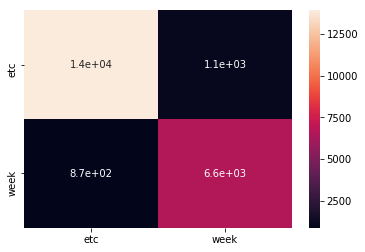

In [29]:
cm = pd.DataFrame(confusion_matrix(y_test_retain_removed, forest_retained.predict(x_test_retain_removed)), columns=forest_retained.classes_, index=forest_retained.classes_)
sns.heatmap(cm, annot=True)

## week removed
---

In [168]:
forest_week = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1, max_features=10, max_depth=25)

In [169]:
forest_week.fit(x_train_week_removed, y_train_week_removed)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [170]:
print("훈련 세트 정확도: {:.3f}".format(forest_week.score(x_train_week_removed, y_train_week_removed)))

훈련 세트 정확도: 0.812


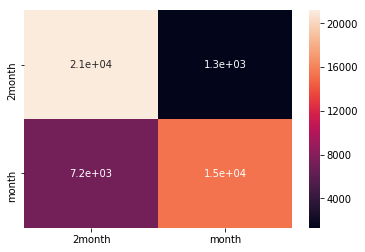

In [171]:
cm = pd.DataFrame(confusion_matrix(y_train_week_removed, forest_week.predict(x_train_week_removed)), columns=forest_week.classes_, index=forest_week.classes_)
sns.heatmap(cm, annot=True)

In [172]:
print("테스트 세트 정확도: {:.3f}".format(forest_week.score(x_test_week_removed, y_test_week_removed)))

테스트 세트 정확도: 0.679


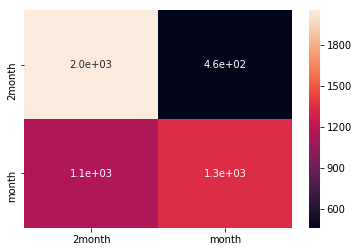

In [173]:
cm = pd.DataFrame(confusion_matrix(y_test_week_removed, forest_week.predict(x_test_week_removed)), columns=forest_week.classes_, index=forest_week.classes_)
sns.heatmap(cm, annot=True)

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
tree = DecisionTreeClassifier(max_depth=1000, random_state=0)

In [157]:
tree.fit(x_train_week_removed, y_train_week_removed)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [158]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(x_train_week_removed, y_train_week_removed)))

훈련 세트 정확도: 0.869


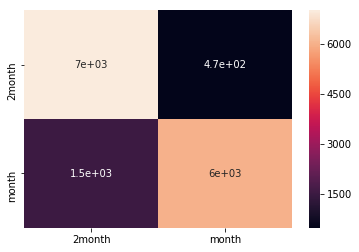

In [159]:
cm = pd.DataFrame(confusion_matrix(y_train_week_removed, tree.predict(x_train_week_removed)), columns=tree.classes_, index=tree.classes_)
sns.heatmap(cm, annot=True)

In [3]:
def plot_feature_importances(model):
    n_features = 36
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(range(36)))
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

In [4]:
plot_feature_importances(tree)

NameError: name 'tree' is not defined

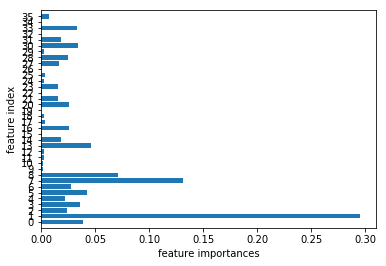

In [161]:
plot_feature_importances(forest_week)

In [145]:
print("테스트 세트 정확도: {:.3f}".format(tree.score(x_test_week_removed, y_test_week_removed)))

테스트 세트 정확도: 0.656


## 테스트 셋!
---

In [275]:
y_test

array(['retained', '2month', 'retained', ..., 'week', 'retained',
       'retained'], dtype=object)

In [276]:
result = np.array(['retained']*len(np.where(forest_normal.predict(x_test) == 'retained')[0]))

In [277]:
y_result = y_test[np.where(forest_normal.predict(x_test) == 'retained')]

In [278]:
filter = forest_normal.predict(x_test) == 'etc'

In [279]:
x_test = x_test[filter]

In [280]:
y_test = y_test[filter]

In [281]:
result = np.concatenate((result, np.array(['week']*len(np.where(forest_retained.predict(x_test) == 'week')[0]))), axis=0)

In [282]:
y_result = np.concatenate((y_result, y_test[np.where(forest_retained.predict(x_test) == 'week')]))

In [283]:
filter = forest_normal.predict(x_test) == 'etc'

In [284]:
x_test = x_test[filter]

In [285]:
y_test = y_test[filter]

In [286]:
result = np.concatenate((result, forest_week.predict(x_test)), axis=0)

In [293]:
y_result = np.concatenate((y_result, y_test), axis=0)

In [298]:
from sklearn.metrics import classification_report

In [300]:
print(classification_report(y_result, result, target_names=['retained', 'week', 'month', '2month']))

             precision    recall  f1-score   support

   retained       0.48      0.83      0.61      7669
       week       0.43      0.59      0.50      7845
      month       0.82      0.60      0.69      8012
     2month       0.88      0.48      0.62     14414

avg / total       0.69      0.60      0.61     37940

